# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *6장 다양한 머신러닝 기법들*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 6.1 다항 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

Mean squared error: 28.387152348114174


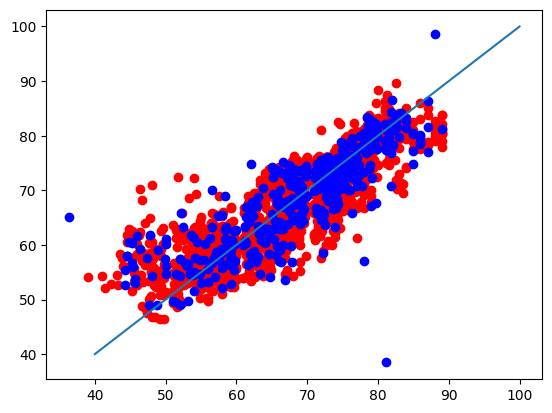

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

### 6.2 다항 회귀의 문제점 - 과적합, 그리고 폭발적인 복잡도 증가

In [7]:
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))

Mean squared error: 22.837446212922007


### 6.3 과적합과 과소적합 - 공짜 점심은 없다

### LAB 6-1: 다항 회귀의 회귀 함수를 그려 보자

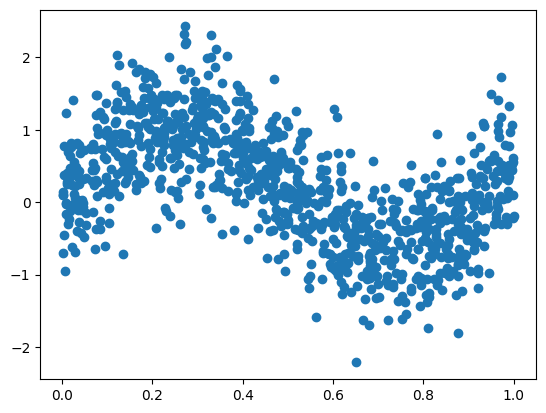

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'], df['y'])

In [9]:
from sklearn.preprocessing import PolynomialFeatures
X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1,1)     # 입력을 2차원 벡터가 되게 한다. shape = (m, 1)
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [10]:
lin_model = LinearRegression()
domain = np.linspace(0, 1, 1000).reshape(-1,1) # 입력은 2차원 벡터로 변형

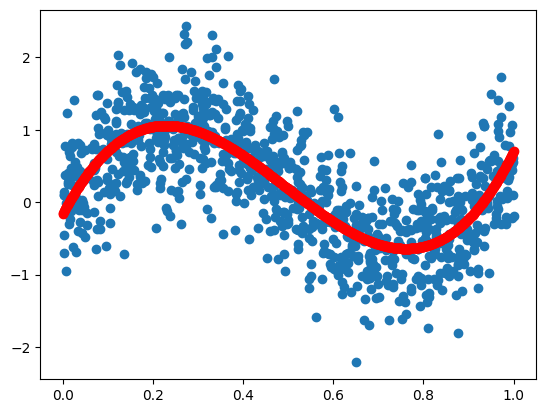

In [11]:
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r')

In [12]:
print('Mean squared error:', mean_squared_error(y, predictions ))

Mean squared error: 0.9655189876432171


### 6.4 결정 트리를 이용한 분류

### 6.5 어떤 속성이 가장 중요한가?

### 6.6 결정 트리를 손으로 만들어 보자 - ID3 알고리즘

### 6.7 지니 불순도를 이용한 효율적인 평가 - CART 알고리즘

### 6.8 사이킷런의 결정 트리로 붓꽃 분류하기

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
)

!ls

dec_tree_for_iris.dot  sample_data  tree.dot


In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

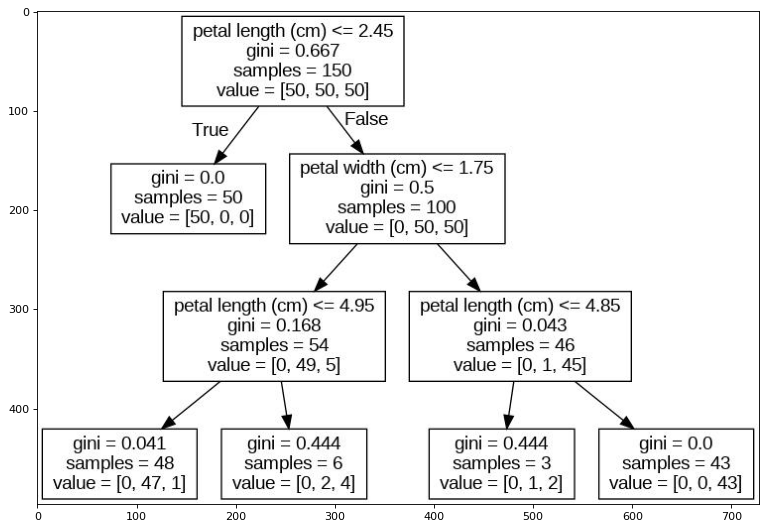

In [ ]:
# @title
import matplotlib.pyplot as plt

dec_tree_img = plt.imread('dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

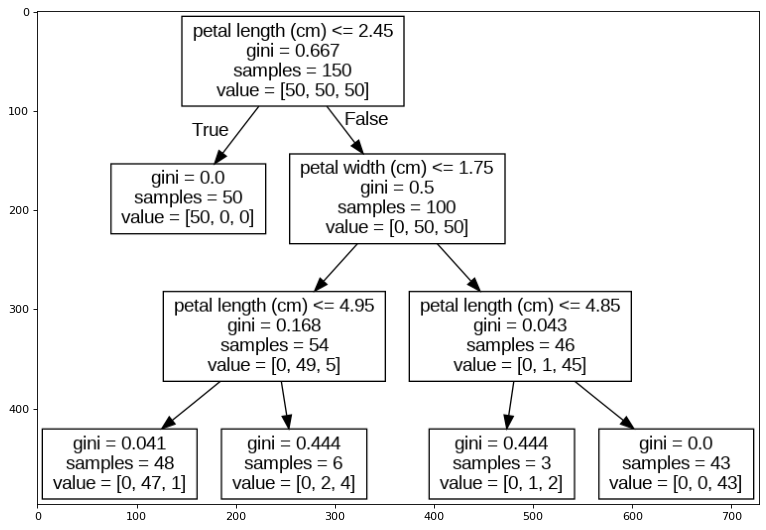

In [ ]:
# @title
import graphviz
from PIL import Image
import matplotlib.pyplot as plt

# Load the DOT file
dot_file = 'dec_tree_for_iris.dot'

# Render the DOT file to an image (e.g., PNG)
graph = graphviz.Source.from_file(dot_file, format='png')
graph.render(filename='dec_tree_for_iris')

# Load and display the generated image
dec_tree_img = Image.open('dec_tree_for_iris.png')

plt.figure(num=None, figsize=(12, 8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)
plt.show()

### LAB 6-2: 꽃받침의 너비와 길이로 결정트리를 만들자

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris2.dot"),
  feature_names=iris.feature_names[:2],
)

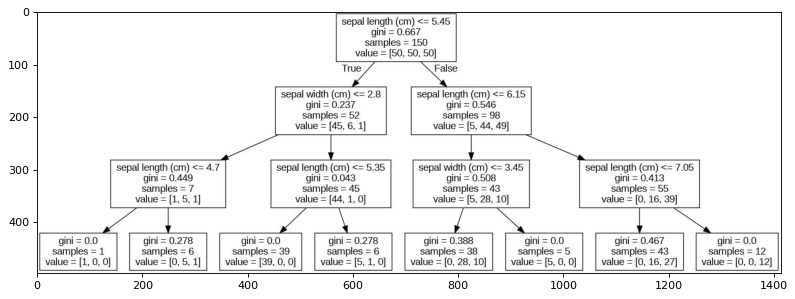

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris2.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris2.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

### LAB 6-3: 엔트로피를 이용하여 결정 트리 만들기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
dec_tree = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
dec_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris3.dot"),
  feature_names=iris.feature_names,
)

In [ ]:
!dot -Tjpg dec_tree_for_iris3.dot -o dec_tree_for_iris3.jpg

import matplotlib.pyplot as plt

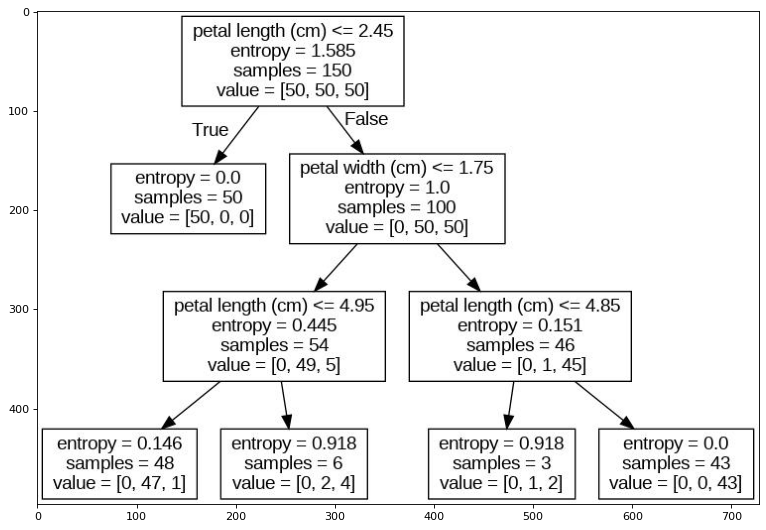

In [ ]:
dec_tree_img = plt.imread('./dec_tree_for_iris3.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)